Помогает бинарным образом класифицировать строку данных и определить вероятность принадлежности к классу по признакам. 

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

we normalize the dataset:

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

We split our dataset into train and test set:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


Modeling (Logistic Regression with Scikit-learn)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [10]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

jaccard index

In [12]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

confusion matrix

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


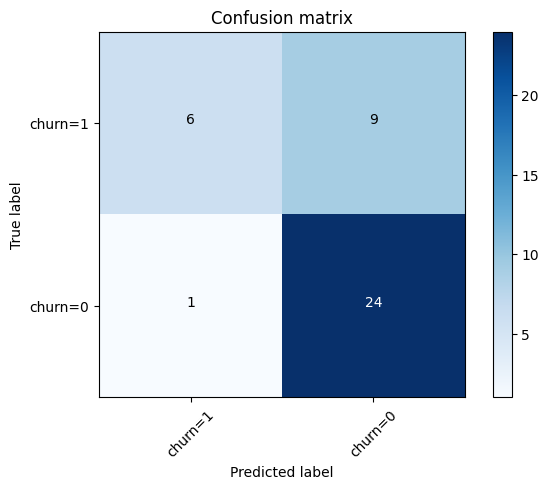

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [15]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



log loss

Now, let's try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [16]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

меняю независимые переменные

In [48]:
churn_df_2 = pd.read_csv("ChurnData.csv")

In [49]:
churn_df_2.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [51]:
churn_df_2 = churn_df_2[['tenure', 'age', 'income', 'ed', 'employ','equip', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat', 'churn']]
churn_df_2['churn'] = churn_df_2['churn'].astype('int')
churn_df_2.head()

C:\Users\chern\AppData\Local\Temp\ipykernel_27252\4041783508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df_2['churn'] = churn_df_2['churn'].astype('int')


,tenure,age,income,ed,employ,equip,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,136.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,33.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,30.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,76.0,2.0,10.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,80.0,2.0,15.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [53]:
X_2 = np.asarray(churn_df_2[['tenure', 'age', 'income', 'ed', 'employ','equip', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat',]])
X_2[0:5]

array([[ 11.  ,  33.  , 136.  ,   5.  ,   5.  ,   0.  ,   0.  ,   1.  ,
          1.  ,   0.  ,   1.48,   3.03,   4.91,   4.  ],
       [ 33.  ,  33.  ,  33.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   2.25,   3.24,   3.5 ,   1.  ],
       [ 23.  ,  30.  ,  30.  ,   1.  ,   2.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   1.84,   3.24,   3.4 ,   3.  ],
       [ 38.  ,  35.  ,  76.  ,   2.  ,  10.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.8 ,   3.81,   4.33,   4.  ],
       [  7.  ,  35.  ,  80.  ,   2.  ,  15.  ,   0.  ,   0.  ,   1.  ,
          1.  ,   0.  ,   1.96,   3.09,   4.38,   3.  ]])

In [54]:
y_2 = np.asarray(churn_df_2['churn'])
y_2 [0:5]

array([1, 1, 0, 0, 0])

In [55]:
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)
X_2[0:5]

array([[-1.14, -0.63,  0.48,  1.7 , -0.58, -0.86, -0.89,  1.09,  1.08,
        -0.89, -0.98, -0.7 ,  1.28,  1.42],
       [-0.12, -0.63, -0.33, -0.64, -1.14, -0.86, -0.89, -0.91, -0.92,
        -0.89,  0.07,  0.04, -0.6 , -1.37],
       [-0.58, -0.86, -0.35, -1.42, -0.92, -0.86, -0.89, -0.91,  1.08,
        -0.89, -0.48,  0.04, -0.73,  0.49],
       [ 0.12, -0.47,  0.01, -0.64, -0.03,  1.16,  1.13,  1.09,  1.08,
         1.13, -0.54,  2.06,  0.51,  1.42],
       [-1.32, -0.47,  0.04, -0.64,  0.53, -0.86, -0.89,  1.09,  1.08,
        -0.89, -0.32, -0.49,  0.57,  0.49]])

In [56]:

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split( X_2, y_2, test_size=0.2, random_state=4)
print ('Train set:', X_train_2.shape,  y_train_2.shape)
print ('Test set:', X_test_2.shape,  y_test_2.shape)

Train set: (160, 14) (160,)
Test set: (40, 14) (40,)


In [57]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_2,y_train_2)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [58]:
yhat_2 = LR.predict(X_test_2)
yhat_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [59]:
yhat_prob_2 = LR.predict_proba(X_test_2)
yhat_prob_2

array([[0.53, 0.47],
       [0.65, 0.35],
       [0.64, 0.36],
       [0.65, 0.35],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.51, 0.49],
       [0.66, 0.34],
       [0.37, 0.63],
       [0.58, 0.42],
       [0.51, 0.49],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.39, 0.61],
       [0.66, 0.34],
       [0.57, 0.43],
       [0.52, 0.48],
       [0.53, 0.47],
       [0.44, 0.56],
       [0.54, 0.46],
       [0.62, 0.38],
       [0.47, 0.53],
       [0.72, 0.28],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.71, 0.29],
       [0.51, 0.49],
       [0.46, 0.54],
       [0.57, 0.43],
       [0.77, 0.23],
       [0.71, 0.29],
       [0.53, 0.47],
       [0.36, 0.64],
       [0.67, 0.33],
       [0.63, 0.37],
       [0.64, 0.36],
       [0.31, 0.69],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.47, 0.53]])

In [60]:
jaccard_score(y_test_2, yhat_2,pos_label=0)

0.5428571428571428

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test_2, yhat_2, labels=[1,0]))

[[ 5 10]
 [ 6 19]]


Confusion matrix, without normalization
[[ 5 10]
 [ 6 19]]


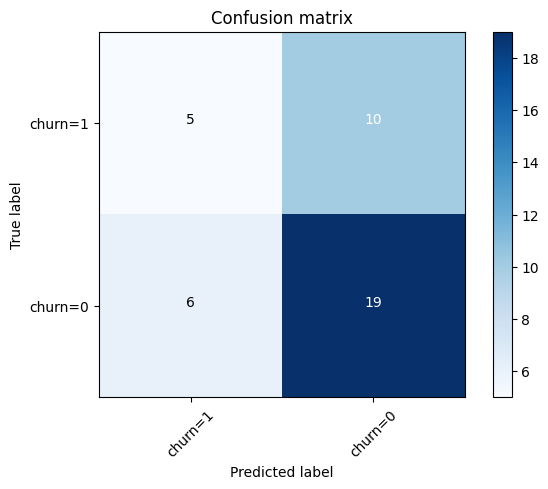

In [62]:

cnf_matrix = confusion_matrix(y_test_2, yhat_2, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [63]:
print (classification_report(y_test_2, yhat_2))

              precision    recall  f1-score   support

           0       0.66      0.76      0.70        25
           1       0.45      0.33      0.38        15

    accuracy                           0.60        40
   macro avg       0.55      0.55      0.54        40
weighted avg       0.58      0.60      0.58        40

